In [342]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

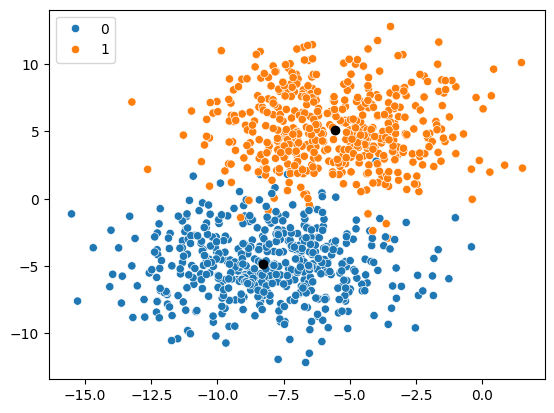

In [343]:
X, y, centers = make_blobs(centers=2, cluster_std=2.5, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [344]:
model = KMeans(n_clusters=2)
model.fit(X)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-6.195712,-8.729624,1.0
1,-6.660348,-5.042996,1.0
2,-7.394629,-6.518156,1.0
3,-11.170863,-1.317215,1.0
4,-7.887393,6.241550,0.0
...,...,...,...
995,-12.162675,-6.664296,1.0
996,-9.950715,-5.736568,1.0
997,-5.625072,-3.784163,1.0
998,-2.954847,7.998887,0.0


In [345]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers, model=model, center_mode=False)

label_mapping = {0: "cluster 0", 1: "cluster 1"}

mapped_pred = [label_mapping[int(label)] for label in pred]

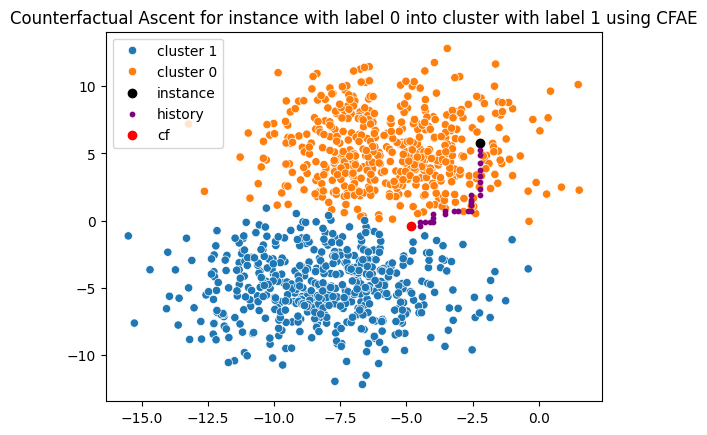

In [346]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=mapped_pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.title('Counterfactual Ascent for instance with label 0 into cluster with label 1 using CFAE')
plt.legend()

## PCA attempt

<Axes: >

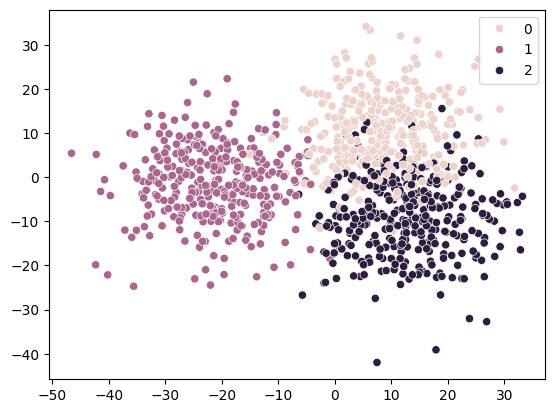

In [347]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [348]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,2.712385,-3.168437,-0.394872,-1.243499,-18.727770,7.119998,-7.496457,-11.200507,-4.090111,-7.605848,...,3.938969,-3.280566,-1.579182,4.616663,14.010160,1.528637,-16.058342,-9.352503,1.919291,0.0
1,-7.310076,-11.492524,3.139823,-9.001820,-17.440035,0.131364,-9.570675,-6.197514,-15.029263,10.798190,...,-9.204472,2.070116,7.361562,7.502420,-4.057276,6.797121,2.397677,-4.244498,7.419052,2.0
2,14.190712,-7.475679,11.630146,14.706721,6.081184,-3.736565,-11.677857,-7.704472,0.843728,-2.436515,...,-5.225741,5.414044,11.718587,22.426412,-17.264776,6.725036,4.221368,3.937800,6.739330,2.0
3,6.461598,-9.921417,20.363068,-2.501490,-5.827019,-5.414779,1.852043,2.098917,-0.155342,8.957429,...,15.296375,18.051693,-5.525840,-0.173450,-6.863867,2.488411,-12.786453,2.958900,-1.408243,0.0
4,2.868102,-11.708766,1.881467,-3.507513,-3.013225,3.467711,-10.987458,-4.071017,1.741559,-1.429172,...,-3.235865,6.416297,5.357412,6.341030,-13.526795,0.994768,-1.353883,-5.144597,-1.604927,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.816178,-4.010856,-11.258352,-0.831341,-14.948792,-0.843680,-8.810058,-14.158548,3.201021,4.962206,...,11.243826,11.831559,-1.623675,17.746795,-6.503902,16.233134,19.346975,-7.053492,-10.982136,0.0
996,12.626996,-7.874166,3.946242,15.206361,-16.476728,6.560463,-12.848909,-5.690809,-6.127327,1.168397,...,7.174555,-0.572312,16.174293,0.627525,-1.971990,2.718921,-5.140636,-2.960529,-6.532653,2.0
997,9.327777,1.795853,10.887480,0.639298,8.437712,9.177327,-3.185621,-5.723739,-4.054848,14.142451,...,16.868806,-7.852699,-11.215735,-14.257499,8.819045,5.984050,-1.997478,8.453315,-8.528237,1.0
998,-5.385549,-8.672678,2.217807,2.132282,-12.641095,19.045050,-22.349410,-14.165317,-4.298357,14.114217,...,7.342399,-6.594329,-3.463295,-9.260042,8.870490,-1.256429,-0.637748,-5.054477,11.270322,1.0


In [349]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

In [350]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

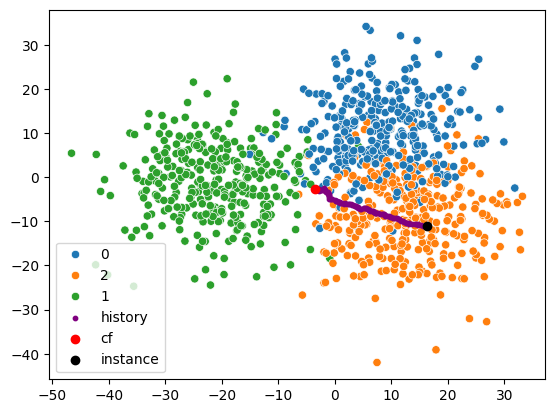

In [351]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()